<div style="background: linear-gradient(90deg, #00f2ff, #ff00ff); padding: 20px; border-radius: 15px; text-align:center; margin:30px 0; box-shadow: 0 0 20px rgba(0,255,255,0.6);">
  <h1 style="color:black; margin:0; font-size:42px; font-weight:900; text-shadow: 2px 2px 10px white;">
    Toyota Used Cars Market Insights
  </h1>
</div>

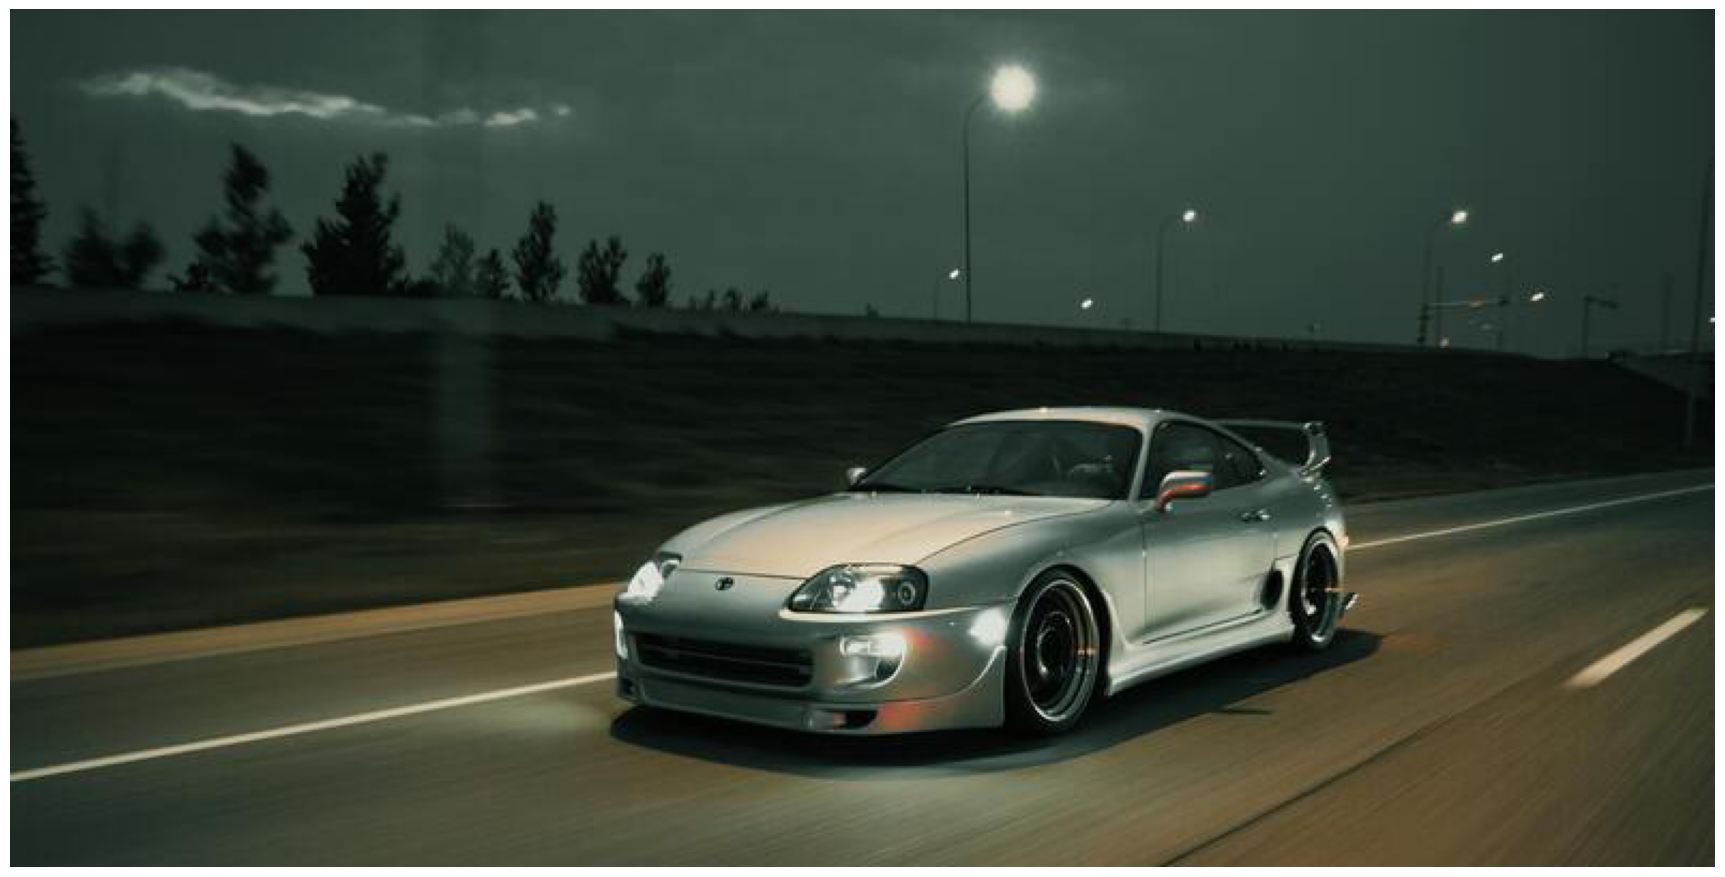

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(r"C:\Users\hp\Pictures\dataset-cover.jpg")
plt.figure(figsize=(22, 14))  
plt.imshow(img)
plt.axis('off')
plt.show()

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;"> IMPORT LIBRARIES,ALGORITHMS AND METRICS
 </h2>
</div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

<div style="background: linear-gradient(90deg, #14ffd8ff, #ff0000ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #14b5ffff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;"> LOAD DATASET
 </h2>
</div>

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\toyota.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


### Toyota Used Cars Dataset: Column Names and Descriptions

| Column Name     | Description                                                                 | Example Values                  |
|-----------------|-----------------------------------------------------------------------------|---------------------------------|
| **model**       | Toyota car model name                                                       | GT86, IQ, Urban Cruiser        |
| **year**        | Year of registration or manufacture of the car                              | 2016, 2017, 2011               |
| **price**       | Selling price of the used car (in £)                                         | 16000, 15995, 5500             |
| **transmission**| Type of gearbox                                                             | Manual, Automatic              |
| **mileage**     | Total distance driven by the car (in miles)                                  | 24089, 18615, 30000            |
| **fuelType**    | Type of fuel the car uses                                                   | Petrol, Diesel                 |
| **tax**         | Annual road tax amount (in £)                                               | 265, 145, 20                   |
| **mpg**         | Fuel efficiency (miles per gallon)                                          | 36.2, 58.9, 50.4               |
| **engineSize**  | Engine displacement/capacity (in liters)                                     | 2.0, 1.0, 1.3                   |

**Dataset Overview**:
- Total rows: 6738
- Columns: 9
- Commonly used for used car price prediction, clustering, or market analysis.

<div style="background: linear-gradient(90deg, #143fffff, #eeff00ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #c0ff14ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Data preprocessing
 </h2>
</div>

In [4]:
for x in df:
    print(x)
    print(df[x].unique())
    print(df[x].nunique())

model
[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']
18
year
[2016 2017 2015 2020 2013 2019 2018 2014 2012 2005 2003 2004 2001 2008
 2007 2010 2011 2006 2009 2002 1999 2000 1998]
23
price
[16000 15995 13998 ...  4950  4849  4985]
2114
transmission
['Manual' 'Automatic' 'Semi-Auto' 'Other']
4
mileage
[24089 18615 27469 ... 36154 60700 45128]
5699
fuelType
['Petrol' 'Other' 'Hybrid' 'Diesel']
4
tax
[265 145 150 260 200 250 140 135 235 300 125  20 160 165 205 240 330 325
   0  30 120 155 115 190  10 305 565 555 540]
29
mpg
[ 36.2  33.2  32.8  39.8  85.6  36.7  72.4  39.2  78.5  58.9  53.3  62.8
  56.5  57.7  37.2  34.5  35.3  40.4  51.1  57.6  60.1  55.4  42.2  43.5
  53.   49.6  52.3  48.7  42.8  47.1  38.2  31.4  32.1  30.4  47.9  78.
  76.3  58.   65.7  55.   86.   66.   80.7  51.4  67.3  74.3  42.9  54.3
  50.4  37.7  44.8  76.4  70.6  61.4  46.3 

In [5]:
df.shape

(6738, 9)

In [6]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [9]:
dt=pd.DataFrame(df.dtypes)
dt["missingval"]=df.isnull().sum()
dt["nunique"]=df.nunique()
dt["count"]=df.count()
dt

,0,missingval,nunique,count
model,object,0,18,6738
year,int64,0,23,6738
price,int64,0,2114,6738
transmission,object,0,4,6738
mileage,int64,0,5699,6738
fuelType,object,0,4,6738
tax,int64,0,29,6738
mpg,float64,0,81,6738
engineSize,float64,0,16,6738


<div style="background: linear-gradient(90deg, #000000ff, #ffffffff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #ff00ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Encoding</h2>
</div>

In [10]:
cols_encode= df.select_dtypes(include=["object"]).columns

In [11]:
le=LabelEncoder()
for col in cols_encode:
    df[col]=le.fit_transform(df[col])

In [12]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,16000,1,24089,3,265,36.2,2.0
1,6,2017,15995,1,18615,3,145,36.2,2.0
2,6,2015,13998,1,27469,3,265,36.2,2.0
3,6,2017,18998,1,14736,3,150,36.2,2.0
4,6,2017,17498,1,36284,3,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,8,2011,5500,0,30000,3,20,58.9,1.0
6734,14,2011,4985,1,36154,3,125,50.4,1.3
6735,14,2012,4995,1,46000,0,125,57.6,1.4
6736,14,2011,3995,1,60700,3,125,50.4,1.3


In [13]:
df_1 = df.copy()

<div style="background: linear-gradient(90deg, #ffeeeeff, #000000ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #ff00ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Scaling</h2>
</div>

In [14]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)

<div style="background: linear-gradient(90deg, #000000ff, #ffffffff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #ff00ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">PCA</h2>
</div>

In [15]:
pca=PCA(n_components=2)
x_reduced=pca.fit_transform(df)

In [16]:
x_reduced

array([[ 0.08810216, -1.61221804],
       [ 0.08223976, -1.33624073],
       [-0.07524302, -1.16311806],
       ...,
       [ 0.18787549,  2.2006233 ],
       [-1.50089205,  2.35353896],
       [-1.50450872,  1.89192018]])

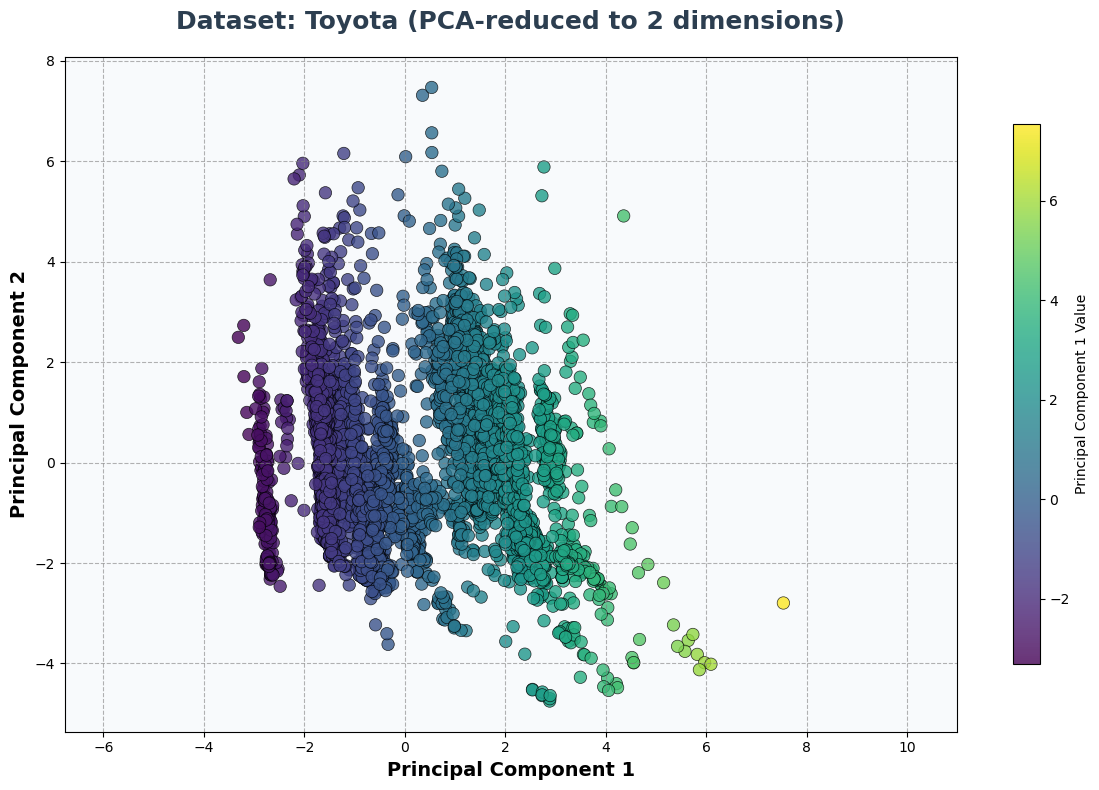

In [17]:

# === Attractive PCA Scatter Plot ===
plt.figure(figsize=(12, 8))

# Scatter with nice colors and styling
scatter = plt.scatter(x_reduced[:, 0], 
                      x_reduced[:, 1],
                      c=x_reduced[:, 0],           # Color by PC1 for gradient effect
                      cmap='viridis',              # Beautiful color map
                      s=80,                        # Larger points
                      alpha=0.8,                   # Slight transparency
                      edgecolor='k',               # Black edge for definition
                      linewidth=0.5)

# Add colorbar
plt.colorbar(scatter, label='Principal Component 1 Value', shrink=0.8)

# Title and labels with bold fonts
plt.title("Dataset: Toyota (PCA-reduced to 2 dimensions)", 
          fontsize=18, fontweight='bold', color='#2C3E50', pad=20)
plt.xlabel("Principal Component 1", fontsize=14, fontweight='bold')
plt.ylabel("Principal Component 2", fontsize=14, fontweight='bold')

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.6, color='gray')

# Light background
plt.gca().set_facecolor('#F8FAFC')

# Equal aspect ratio to avoid distortion
plt.axis('equal')

# Tight layout
plt.tight_layout()

plt.show()

<div style="background: linear-gradient(90deg, #ff14c0ff, #0088ffff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #14fbffff;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">KMeans</h1>
</div>




<h3 style="background-color: #ff0000ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Elbow Method </h3



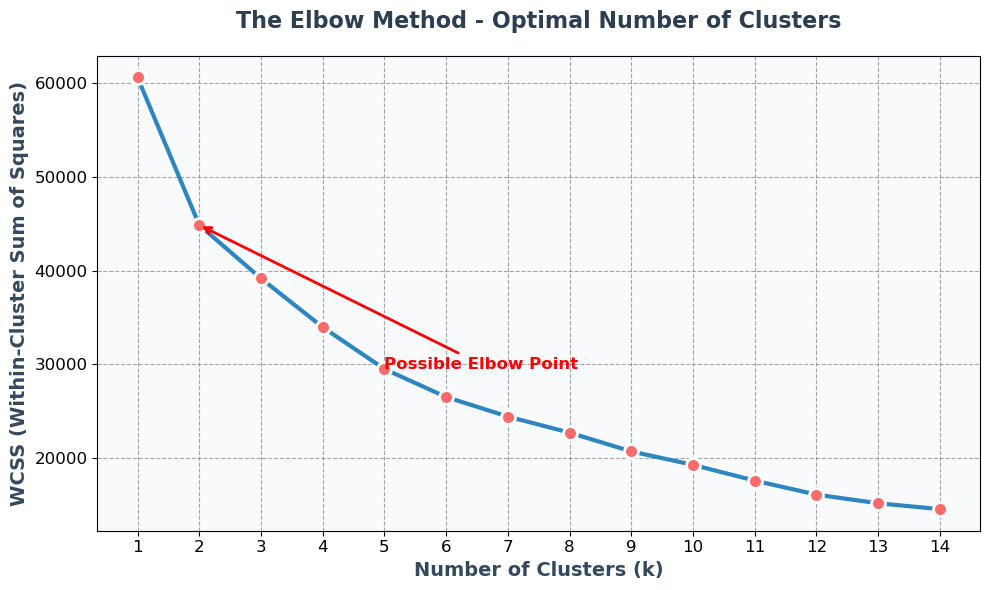

In [18]:

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# === Attractive Elbow Plot ===
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, 
         marker='o',                  # Circle markers at each point
         linestyle='-', 
         color='#2E86C1',            # Professional blue color
         linewidth=3, 
         markersize=10, 
         markerfacecolor='#FF6B6B',  # Red marker fill
         markeredgecolor='white', 
         markeredgewidth=2)

# Add title and labels with better fonts
plt.title('The Elbow Method - Optimal Number of Clusters', 
          fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold', color='#34495E')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14, fontweight='bold', color='#34495E')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7, color='gray')

# Customize ticks
plt.xticks(range(1, 15), fontsize=12)
plt.yticks(fontsize=12)

# Add a subtle background color
plt.gca().set_facecolor('#F8FAFC')

# Add annotation for the "elbow" (you can adjust the position based on your plot)
plt.annotate('Possible Elbow Point', 
             xy=(2, wcss[1]),          # Arrow tip at k=2
             xytext=(5, wcss[4]),      # Text positioned to the right and up
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, color='red', fontweight='bold')
# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

In [19]:
data=df.values

In [20]:
type(data)

numpy.ndarray

In [21]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [22]:
from sklearn.metrics import silhouette_score
score1 = silhouette_score(data, y_kmeans)

print("Silhouette Score:", score1)

Silhouette Score: 0.3055711722109206


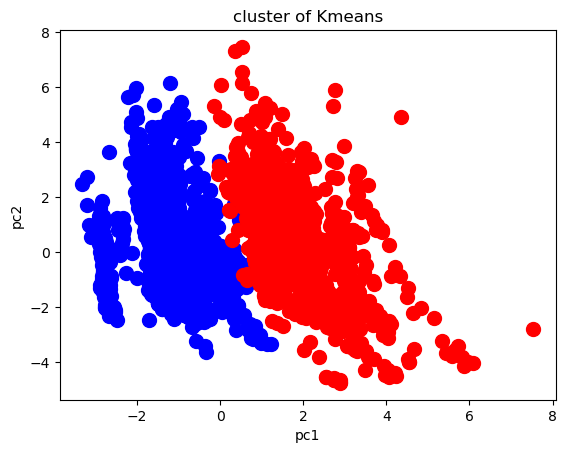

In [23]:
plt.scatter(x_reduced[y_kmeans==0,0],x_reduced[y_kmeans==0,1],s=100,c='blue',label='cluster1')
plt.scatter(x_reduced[y_kmeans==1,0],x_reduced[y_kmeans==1,1],s=100,c='red',label='cluster2')
plt.title('cluster of Kmeans')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [24]:
new=[[6,2016,16000,1,24089,3,265,36.2,2.0]]

In [25]:
y_kmeans

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
prd=kmeans.predict(new)
prd

array([1])

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">DBSCAN</h1>
</div>

In [27]:
epsilon=0.7
min_samples=5
dbscan=DBSCAN(eps=epsilon,min_samples=min_samples)
labels=dbscan.fit_predict(x_reduced)

In [ ]:


# After labels = dbscan.fit_predict(x_reduced)

unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Clusters: {n_clusters}, Noise points: {n_noise}")

# Silhouette excluding noise (standard practice)
if n_clusters > 1 and n_noise < len(x_reduced):
    sil = silhouette_score(x_reduced[labels != -1], labels[labels != -1])
    print(f"Silhouette Score (excluding noise): {sil:.3f}")
else:
    print("Not enough clusters for silhouette score")

Clusters: 3, Noise points: 12
Silhouette Score (excluding noise): 0.482


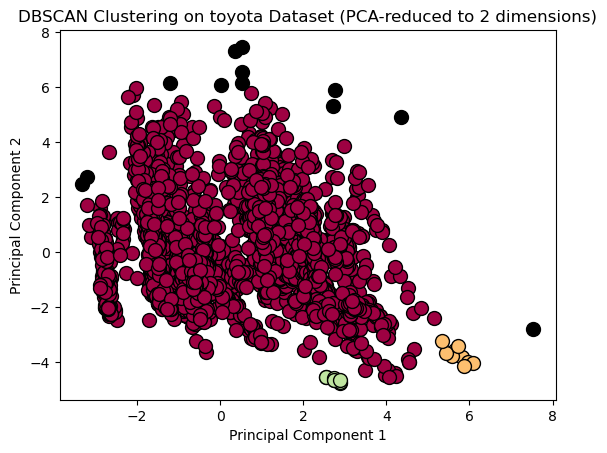

In [29]:
unique_labels=set(labels)
colors=[plt.cm.Spectral(each) for each in np.linspace(0,1, len(unique_labels))]
for k, col in zip(unique_labels,colors):
    if k==-1:
        col = [0,0,0,1]
    class_member_mask=(labels==k)
    xy=x_reduced[class_member_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=10)

plt.title("DBSCAN Clustering on toyota Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [30]:
unique_labels

{-1, 0, 1, 2}

In [ ]:

score2 = silhouette_score(df, labels)

print("Silhouette Score:", score2)

Silhouette Score: 0.4799940645048715


<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">HIERACHICAL CLUSTERING
</h1>
</div>




<h3 style="background-color: #00f777ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
dendrogram</h3



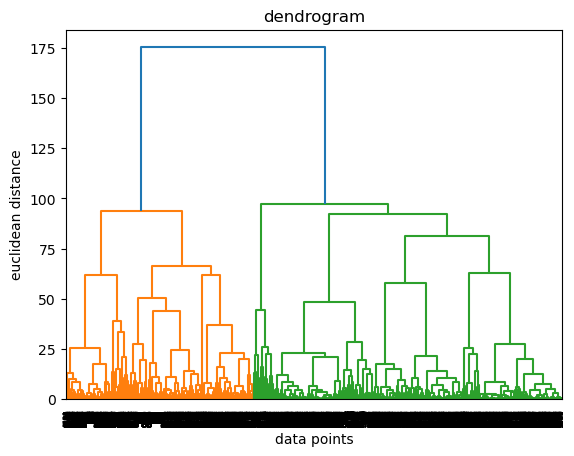

In [32]:
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

In [33]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(df)
y_ahc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:

sil_ahc=silhouette_score(df,y_ahc)
sil_ahc


0.3017725639397218

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">FUZZY CLUSTERING
</h1>
</div>

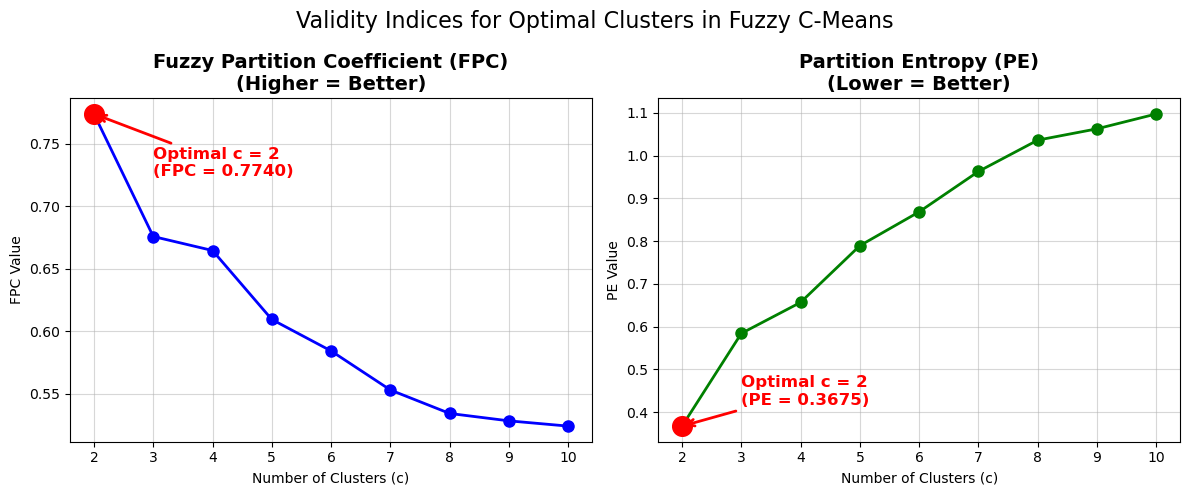

FPC values: [0.774, 0.6758, 0.6646, 0.6093, 0.5841, 0.5528, 0.534, 0.5281, 0.5239]
Best c by FPC: 2
PE values: [0.3675, 0.5844, 0.657, 0.7896, 0.8687, 0.9632, 1.0364, 1.0629, 1.0976]
Best c by PE: 2


In [35]:

# Your PCA-reduced data transposed for skfuzzy
X = x_reduced.T  # (features x samples)

cluster_range = range(2, 11)

fpc_values = []  # Fuzzy Partition Coefficient (higher better)
pe_values = []   # Partition Entropy (lower better)

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X, c=c, m=2.0, error=0.005, maxiter=1000, init=None
    )
    fpc_values.append(fpc)
    
    # Calculate Partition Entropy (PE)
    pe = -np.sum(u * np.log(u)) / u.shape[1]  # Average entropy
    pe_values.append(pe)

# === Plot FPC (recommended) ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, fpc_values, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)
plt.title('Fuzzy Partition Coefficient (FPC)\n(Higher = Better)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (c)')
plt.ylabel('FPC Value')
plt.grid(True, alpha=0.5)
plt.xticks(cluster_range)

# Highlight max FPC
best_c_fpc = cluster_range[np.argmax(fpc_values)]
plt.scatter(best_c_fpc, max(fpc_values), color='red', s=200, zorder=5)
plt.annotate(f'Optimal c = {best_c_fpc}\n(FPC = {max(fpc_values):.4f})', 
             xy=(best_c_fpc, max(fpc_values)), 
             xytext=(best_c_fpc + 1, max(fpc_values) - 0.05),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, color='red', fontweight='bold')

# === Plot PE (lower better) ===
plt.subplot(1, 2, 2)
plt.plot(cluster_range, pe_values, marker='o', linestyle='-', color='green', linewidth=2, markersize=8)
plt.title('Partition Entropy (PE)\n(Lower = Better)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (c)')
plt.ylabel('PE Value')
plt.grid(True, alpha=0.5)
plt.xticks(cluster_range)

# Highlight min PE
best_c_pe = cluster_range[np.argmin(pe_values)]
plt.scatter(best_c_pe, min(pe_values), color='red', s=200, zorder=5)
plt.annotate(f'Optimal c = {best_c_pe}\n(PE = {min(pe_values):.4f})', 
             xy=(best_c_pe, min(pe_values)), 
             xytext=(best_c_pe + 1, min(pe_values) + 0.05),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, color='red', fontweight='bold')

plt.suptitle('Validity Indices for Optimal Clusters in Fuzzy C-Means', fontsize=16)
plt.tight_layout()
plt.show()

# Print results
print("FPC values:", [round(v, 4) for v in fpc_values])
print("Best c by FPC:", best_c_fpc)
print("PE values:", [round(v, 4) for v in pe_values])
print("Best c by PE:", best_c_pe)

Optimal number of clusters (by FPC): 2
Highest FPC: 0.7740


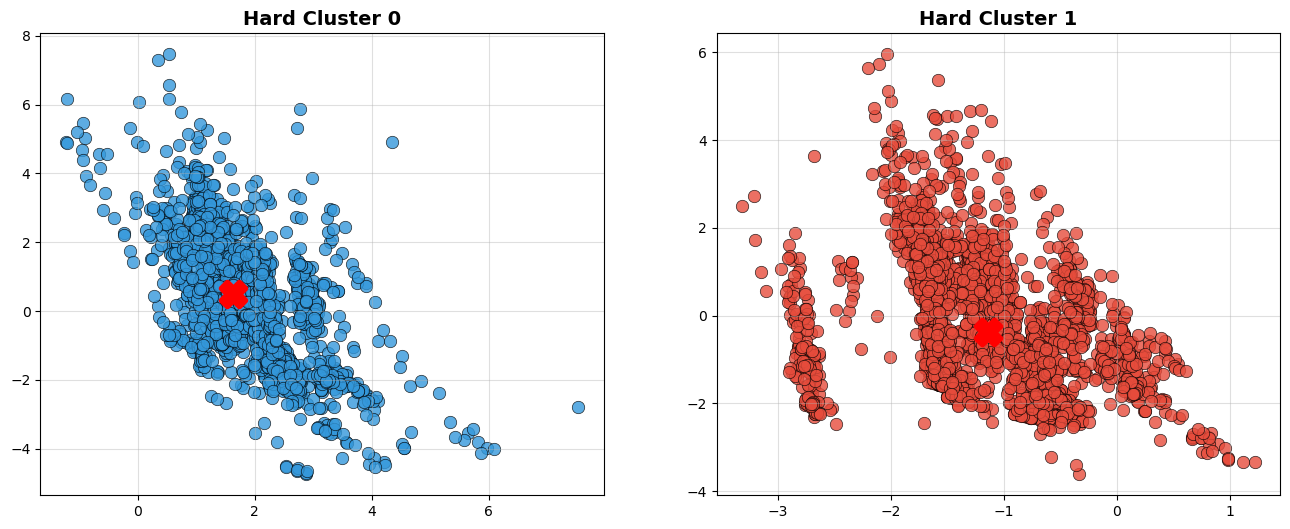

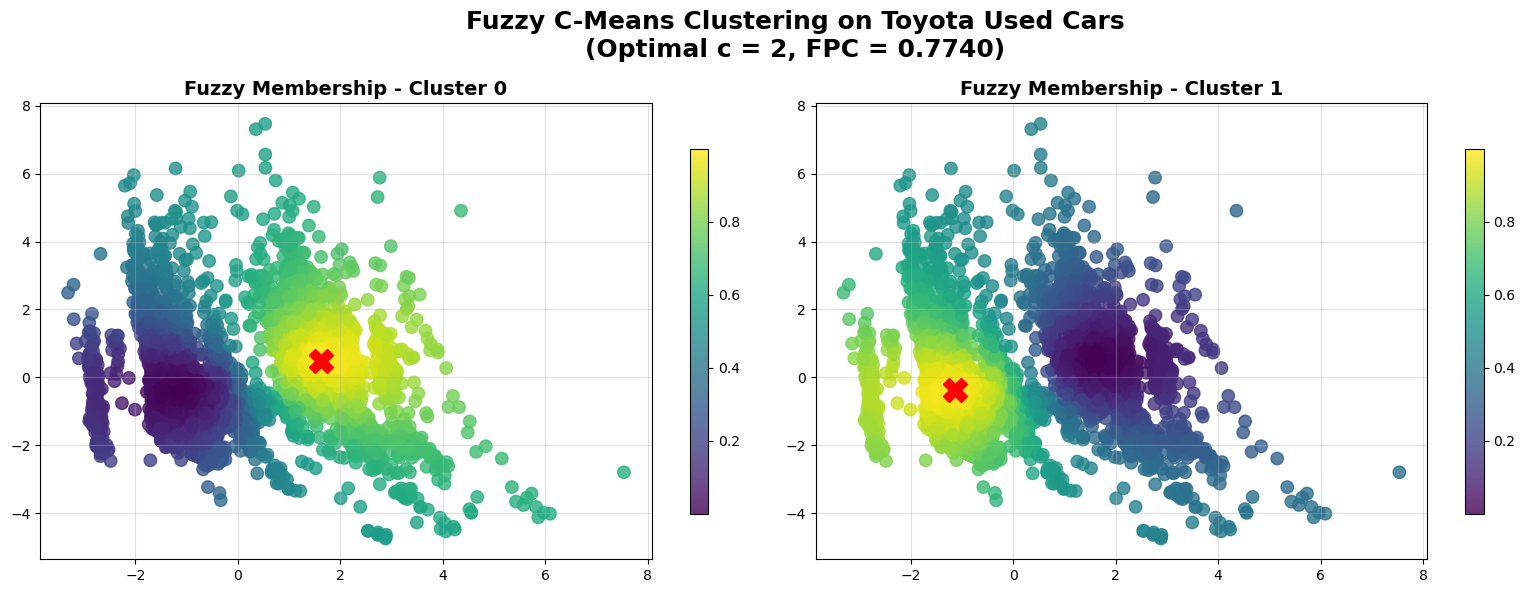

In [36]:

# Your PCA-reduced data (samples x features)
# Make sure x_reduced is (6738, 2)
data_fuzzy = x_reduced.T  # Transpose to (2, 6738) for skfuzzy

cluster_range = range(2, 11)

fpc_values = []

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_fuzzy, c=c, m=2.0, error=0.005, maxiter=1000, init=None
    )
    fpc_values.append(fpc)

# Find optimal c (highest FPC)
optimal_c = cluster_range[np.argmax(fpc_values)]
print(f"Optimal number of clusters (by FPC): {optimal_c}")
print(f"Highest FPC: {max(fpc_values):.4f}")

# === Re-run Fuzzy C-Means with optimal c ===
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_fuzzy, c=optimal_c, m=2.0, error=0.005, maxiter=1000, init=None
)

# Crisp labels
hard_labels = np.argmax(u, axis=0)

# === Beautiful Plot for Fuzzy C-Means (c=2) ===
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns for c=2

colors = ['#3498DB', '#E74C3C']  # Blue and Red

# Left: Hard Cluster 0
axs[0].scatter(x_reduced[hard_labels == 0, 0],
               x_reduced[hard_labels == 0, 1],
               c=colors[0], s=80, alpha=0.8, edgecolor='k', linewidth=0.5)
axs[0].scatter(cntr[0, 0], cntr[0, 1],
               c='red', s=300, marker='X', linewidth=4)
axs[0].set_title('Hard Cluster 0', fontsize=14, fontweight='bold')
axs[0].grid(True, alpha=0.4)

# Right: Hard Cluster 1
axs[1].scatter(x_reduced[hard_labels == 1, 0],
               x_reduced[hard_labels == 1, 1],
               c=colors[1], s=80, alpha=0.8, edgecolor='k', linewidth=0.5)
axs[1].scatter(cntr[1, 0], cntr[1, 1],
               c='red', s=300, marker='X', linewidth=4)
axs[1].set_title('Hard Cluster 1', fontsize=14, fontweight='bold')
axs[1].grid(True, alpha=0.4)

# Fuzzy Membership Subplots (below)
fig2, axs2 = plt.subplots(1, 2, figsize=(16, 6))

for i in range(optimal_c):
    scatter = axs2[i].scatter(x_reduced[:, 0],
                              x_reduced[:, 1],
                              c=u[i, :],
                              cmap='viridis',
                              s=80,
                              alpha=0.8)
    axs2[i].scatter(cntr[i, 0], cntr[i, 1],
                    c='red', s=300, marker='X')
    plt.colorbar(scatter, ax=axs2[i], shrink=0.8)
    axs2[i].set_title(f'Fuzzy Membership - Cluster {i}', fontsize=14, fontweight='bold')
    axs2[i].grid(True, alpha=0.4)

plt.suptitle(f'Fuzzy C-Means Clustering on Toyota Used Cars\n(Optimal c = {optimal_c}, FPC = {fpc:.4f})', 
             fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(90deg, #14ffb5ff, #ff00ffff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;"> Tabulate
</h1>
</div>

In [37]:
from tabulate import tabulate

table = [
    ['Clustering Method', 'Score'],
    ['KMeans', score1],
    ['DBSCAN', score2],
    ['Agglomerative', sil_ahc],
    ['Fuzzy C-Means', fpc],
   
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═════════════════════╤══════════╕
│ Clustering Method   │    Score │
╞═════════════════════╪══════════╡
│ KMeans              │ 0.305571 │
├─────────────────────┼──────────┤
│ DBSCAN              │ 0.479994 │
├─────────────────────┼──────────┤
│ Agglomerative       │ 0.301773 │
├─────────────────────┼──────────┤
│ Fuzzy C-Means       │ 0.773975 │
╘═════════════════════╧══════════╛


<div style="background: linear-gradient(90deg, #14ffb5ff, #ff0044ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;"> Conclusion
</h1>
</div>

In [ ]:

df_1['Fuzzy_Cluster'] = hard_labels

numerical_cols = ['price', 'year', 'mileage', 'mpg', 'engineSize', 'tax']
summary = df_1.groupby('Fuzzy_Cluster')[numerical_cols].mean().round(2)
summary['Count'] = df_1['Fuzzy_Cluster'].value_counts()
summary = summary[['Count', 'price', 'year', 'mileage', 'mpg', 'engineSize', 'tax']]
summary = summary.sort_index()

print(summary)

               Count     price     year   mileage    mpg  engineSize     tax
Fuzzy_Cluster                                                               
0               2687  17009.89  2016.49  28111.79  69.86        1.87   81.43
1               4051   9545.87  2016.92  19372.22  58.52        1.21  103.50


### Toyota Used Car Market Segments (Fuzzy C-Means c=2) - Original Values

| Cluster | Count | Price (£) | Year    | Mileage   | MPG    | Engine Size (L) | Tax (£) | Segment Name             | Description |
|---------|-------|-----------|---------|-----------|--------|-----------------|---------|--------------------------|-------------|
| **0**   | 4051  | 9545.87  | 2016.92 | 19372.22 | 58.52 | 1.21           | 103.50 | **Mainstream Low-Mileage** | Larger group: Recent cars (avg. 2017), very low mileage, moderate price and specs — typical reliable everyday/family used Toyotas (mainstream buyers). |
| **1**   | 2687  | 17009.89 | 2016.49 | 28111.79 | 69.86 | 1.87           | 81.43  | **Premium Higher-Mileage** | Higher price, slightly older, higher mileage but excellent fuel efficiency (high MPG) and larger engines — buyers prioritizing performance and economy. |

**Notes**:
- Values are **average in original units**.
- Total cars: 6738
- **Optimal c=2** based on highest FPC (strongest fuzzy partition with clear separation).
- The two clusters capture the primary division: mainstream low-mileage (60%) vs premium higher-mileage/efficient (40%).



### Short Conclusion on Fuzzy C-Means Clustering Results (Optimal c=2)

The Fuzzy C-Means clustering with the optimal number of clusters (**c=2**, determined by the highest FPC = 0.7740) effectively divides the Toyota used car market into two clear and meaningful segments:

- **Cluster 0 (Mainstream Low-Mileage, 60%)**: The dominant group — recent cars (avg. 2017) with very low mileage (~19,372), moderate price (~£9,546), and balanced specs. Represents typical everyday/family buyers seeking reliable, lightly used Toyotas.
- **Cluster 1 (Premium Higher-Mileage, 40%)**: Higher-priced cars (~£17,010) with slightly older years but excellent fuel efficiency (high MPG ~69.86) and larger engines. Appeals to buyers prioritizing performance, economy, and longer-term value.

The high FPC indicates a strong fuzzy partition with clear separation and natural overlaps, reflecting realistic market transitions (e.g., from low-mileage mainstream to higher-mileage premium/efficient cars). This simple 2-cluster model provides actionable insights for inventory management, pricing strategies, and targeted marketing in the used Toyota segment.

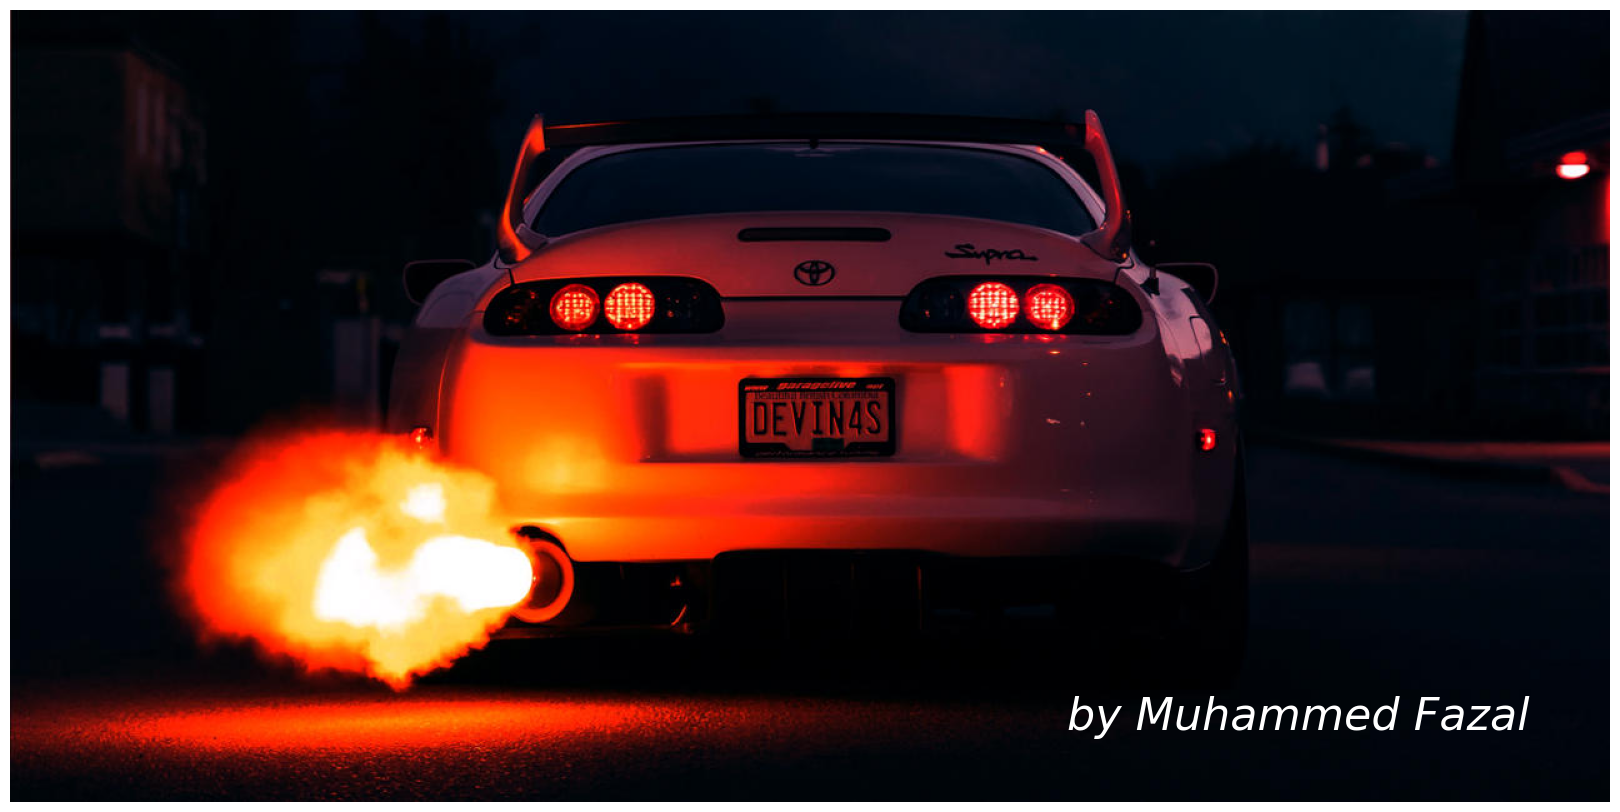

In [ ]:
img_path = r"C:\Users\hp\Pictures\supra_antilag_wallpaper_by_szym000_dermfn1-fullview.jpg"  
img = mpimg.imread(img_path)

# Create figure
plt.figure(figsize=(16, 10))
plt.imshow(img)
plt.axis('off')

# Your name - bottom right
plt.text(0.95, 0.08, 'by Muhammed Fazal',
         fontsize=32, color='white', style='italic',
         ha='right', va='bottom', transform=plt.gca().transAxes)
        #  bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', pad=12)

# Remove margins completely
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)

# Save high quality + show
plt.savefig('Instagram_Analytics_Cover_Final.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()